In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
import numpy as np
%matplotlib inline

In [62]:
from cProfile import label


def my_plot(gen, attack, attr, savedir):


    ## POSITION
    # if attr == 'pos':
    figure(figsize=(8,8), dpi=50)
    plt.title('Genuine Car vs Broadcasted Attacker {}'.format(attr))
    genuine_coords = gen[attr].to_list()
    genuine_x = [i[0] for i in genuine_coords]
    genuine_y = [i[1] for i in genuine_coords]

    attack_coords = attack[attr].to_list()
    attack_x = [i[0] for i in attack_coords]
    attack_y = [i[1] for i in attack_coords]

    N_gen = len(genuine_x)
    N_att = len(attack_x)
    # plt.subplot(2,2,1)
    plt.plot(list(range(N_gen)), genuine_x, color='blue', label='genuine_x')
    plt.plot(list(range(N_gen)), genuine_y, color='c', label='genuine_y')
    
    plt.plot(list(range(N_att)), attack_x, color='r', label='broadcasted attacker_x')
    plt.plot(list(range(N_att)), attack_y, color='m', label='broadcasted attacker_y')
    # plt.title('Genuine vs Real Car {}'.format(attr))
    plt.xlabel('step')
    plt.ylabel('magnitude')
    plt.legend()
    plt.savefig(savedir+'/{}.png'.format(attr), bbox_inches='tight')


    # else:
    #     figure(figsize=(15, 15), dpi=100)

    #     genuine_coords = gen[attr].to_list()
    #     # genuine_x = [i[0] for i in genuine_coords]
    #     genuine_y = [float(np.linalg.norm(i)) for i in genuine_coords]

    #     attack_coords = attack[attr].to_list()
    #     # attack_x = [i[0] for i in attack_coords]
    #     attack_y = [float(np.linalg.norm(i)) for i in attack_coords]

    #     plt.subplot(2,2,1)
    #     plt.title('Genuine Car {}'.format(attr))
    #     plt.xlabel('Step')
    #     plt.ylabel('Magnitude')
    #     # plt.plot(list(range(len(genuine_x))), genuine_x, color='b', label='genuine_x')
    #     plt.plot(list(range(len(genuine_y))), genuine_y, color='c', label='genuine_y')
    #     plt.legend()


    #     plt.subplot(2,2,2)
    #     plt.title('Attacker Car {}'.format(attr))
    #     plt.xlabel('Step')
    #     plt.ylabel('Magnitude')
    #     # plt.plot(list(range(len(attack_x))), attack_x, color='r', label='attacker_x')
    #     plt.plot(list(range(len(attack_y))), attack_y, color='m', label='attacker_y')

    #     plt.legend()


    


In [63]:
def read_data(filename):
    d = {'type': [], 'spd': [], 'acl': [], 'hed':[], 'pos':[], 'sender': []}
    data = pd.DataFrame.from_dict(d)
    with open(filename, 'r') as f:
        lines = f.readlines()

        pos, acl, hed, spd, type, rcvTime, sender = [], [], [], [], [], [], []

        for idx, line in enumerate(lines):
            # data = pd.concat([pd.read_json(line), data], ignore_index=True)
            d = json.loads(line)
            pos.append(tuple(d['pos'][:2]))
            acl.append(tuple(d['acl'][:2]))
            hed.append(tuple(d['hed'][:2]))
            spd.append(tuple(d['spd'][:2]))
            if 'sender' in d.keys():
                sender.append(d['sender'])
            else:
                sender.append('none')
            type.append(d['type'])
            rcvTime.append(d['rcvTime'])
        data['spd'] = spd
        data['acl'] = acl
        data['hed'] = hed
        data['pos'] = pos       
        data['type'] = type    
        data['rcvTime'] = rcvTime 
        data['sender'] = sender

    return data

# Part 6

In [64]:
part_6_data_genuine = read_data('part6_data\\genuine.json')
part_6_data_genuine = part_6_data_genuine.loc[part_6_data_genuine['type'] == 2]
part_6_data_genuine = part_6_data_genuine.sort_values(by='rcvTime', ascending=True)
part_6_data_genuine.head()

,type,spd,acl,hed,pos,sender,rcvTime
0,2,"(0.0, 0.0)","(4.2914035176620985e-07, 4.2914035176620985e-07)","(-0.9787756554696023, -0.20493466339311767)","(1362.2717006787284, 852.1051256723805)",none,30.1
1,2,"(-0.25218581024272213, -0.052800653329742014)","(-2.5218433854853894, -0.5279918163555883)","(-0.9787756554695978, -0.20493466339313895)","(1362.3493551142149, 852.101443283184)",none,30.2
3,2,"(-0.5049338281049187, -0.10571814414315077)","(-2.527452047976534, -0.5291467774887247)","(-0.9787756554696023, -0.20493466339311767)","(1362.314963452847, 852.0910326265727)",none,30.3
4,2,"(-0.7586670777964026, -0.15883739657296386)","(-2.537358785350824, -0.5312188127341152)","(-0.9787756554696023, -0.20493466339311767)","(1362.2605007231168, 852.077308462764)",none,30.4
5,2,"(-0.9794715753111156, -0.2050662267664694)","(-2.2080331385321337, -0.4622764653200592)","(-0.9787756554696023, -0.20493466339311767)","(1362.4078956320907, 852.0618269857051)",none,30.5


In [65]:
part_6_data_attacker = read_data('part6_data\\attacker.json')
# print(part_6_data_attacker['sender'].value_counts())
part_6_data_attacker = part_6_data_attacker.loc[(part_6_data_attacker['type'] == 3) & (part_6_data_attacker['sender'] == 105)]
# part_6_data_attacker = part_6_data_attacker.loc[(part_6_data_attacker['type'] == 2)]
part_6_data_attacker = part_6_data_attacker.sort_values(by='rcvTime', ascending=True)
part_6_data_attacker.head()

,type,spd,acl,hed,pos,sender,rcvTime


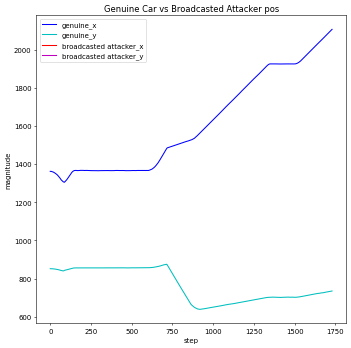

In [66]:
my_plot(part_6_data_genuine, part_6_data_attacker, 'pos', 'part6_data')


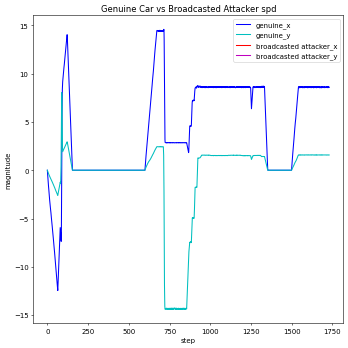

In [67]:
my_plot(part_6_data_genuine, part_6_data_attacker, 'spd', 'part6_data')


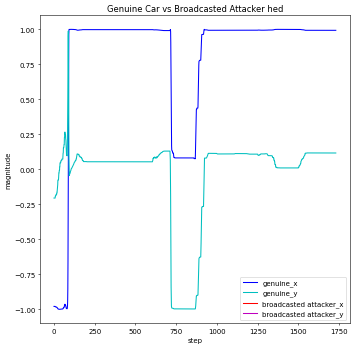

In [68]:
my_plot(part_6_data_genuine, part_6_data_attacker, 'hed', 'part6_data')


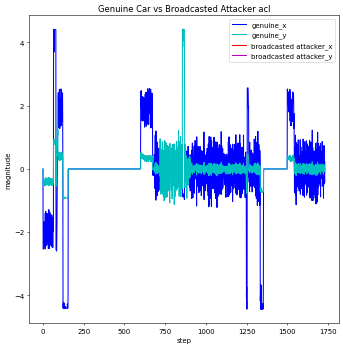

In [69]:
my_plot(part_6_data_genuine, part_6_data_attacker, 'acl', 'part6_data')


# Part 7

In [70]:
part_8_data_genuine = read_data('part_8_data\\genuine.json')
part_8_data_genuine = part_8_data_genuine.loc[part_8_data_genuine['type'] == 2]
part_8_data_genuine = part_8_data_genuine.sort_values(by='rcvTime', ascending=True)
part_8_data_genuine.head()

,type,spd,acl,hed,pos,sender,rcvTime
0,2,"(0.0, 0.0)","(5.371446783474552e-05, 5.371446783474552e-05)","(-0.9839356641182174, -0.1785234126837215)","(1862.6841058971231, 941.9267054103399)",none,26.1
1,2,"(-0.25293064292375467, -0.04604436411081783)","(-2.5294157330710836, -0.46055294494171517)","(-0.9839356641182191, -0.17852341268371275)","(1862.6603287054622, 941.9218967702101)",none,26.2
3,2,"(-0.5073197084001995, -0.09237301652162426)","(-2.5438864404893686, -0.4632823098329507)","(-0.9845226650757929, -0.17525730213619659)","(1862.7889380015117, 941.9165068060465)",none,26.3
5,2,"(-0.7298140738271388, -0.13283256204622276)","(-2.2256526360546123, -0.40530443703120406)","(-0.9851737874370382, -0.1715593440969088)","(1863.0893575178754, 941.9113136180154)",none,26.4
6,2,"(-0.9446346297965558, -0.17195510392734853)","(-2.1481430819536302, -0.39116294107071875)","(-0.9855243509188718, -0.16953393095760033)","(1862.8788723390333, 941.8898057174524)",none,26.5


In [71]:
part_8_data_attacker = read_data('part_8_data\\attacker.json')
# print(part_8_data_attacker['sender'].value_counts())
part_8_data_attacker = part_8_data_attacker.loc[(part_8_data_attacker['type'] == 3) & (part_8_data_attacker['sender'] == 33)]
# part_8_data_attacker = part_8_data_attacker.loc[(part_8_data_attacker['type'] == 3)]
part_8_data_attacker = part_8_data_attacker.sort_values(by='rcvTime', ascending=True)
part_8_data_attacker.head()

,type,spd,acl,hed,pos,sender,rcvTime


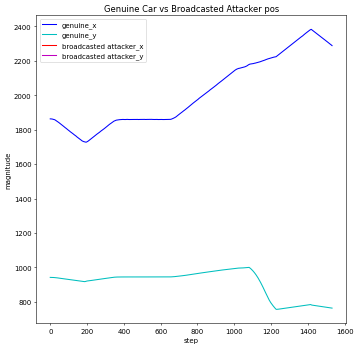

In [72]:
my_plot(part_8_data_genuine, part_8_data_attacker, 'pos', 'part_8_data')

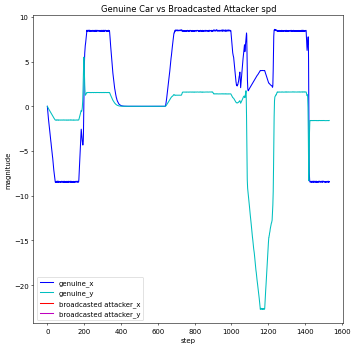

In [73]:
my_plot(part_8_data_genuine, part_8_data_attacker, 'spd', 'part_8_data')



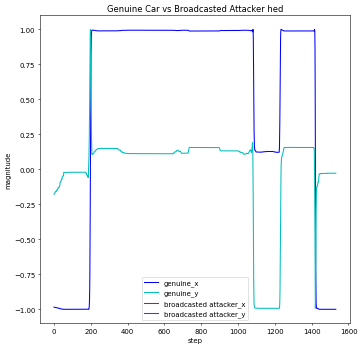

In [74]:
my_plot(part_8_data_genuine, part_8_data_attacker, 'hed', 'part_8_data')


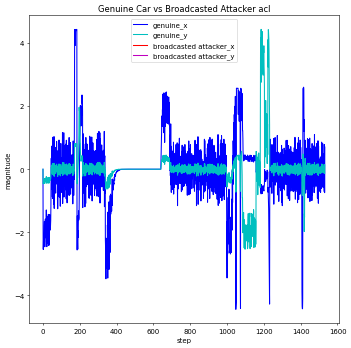

In [75]:
my_plot(part_8_data_genuine, part_8_data_attacker, 'acl', 'part_8_data')
